# Trading Bot (Machine Learning Approach)

In this independent project, the goal is to develop and enhance an algorithmic trading system using machine learning. The focus is on creating a trading bot capable of adapting to market changes by integrating machine learning algorithms into the existing trading signals.

## Project Structure

### 1. Establishing a Baseline Performance

### 2. Tuning the Baseline Trading Algorithm

### 3. Evaluating a New Machine Learning Classifier

### 4. Comparing the 2 models


In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

---

## Establishing a Baseline Performance

The objective of this phase is to initiate the project by establishing a baseline performance for the trading algorithm.



### Step 1: importing the OHLCV dataset into a Pandas DataFrame.

In [2]:
# Import the OHLCV dataset into a Pandas Dataframe
ohlcv_df = pd.read_csv(
    Path("./Data/OHLCV.csv"), 
    index_col='date', 
    parse_dates=True
)

# Review the DataFrame
ohlcv_df.head()

C:\Users\sakko\AppData\Local\Temp\ipykernel_8056\4211302998.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ohlcv_df = pd.read_csv(


,open,high,low,close,volume
date,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200


In [3]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:, ["close"]]

# Use the pct_change function to generate returns from close prices
signals_df["Actual Returns"] = signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns
date,,
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818
2015-01-26 12:30:00,24.33,-0.005315


,close,Actual Returns
date,,
2021-01-22 09:30:00,33.27,-0.006866
2021-01-22 11:30:00,33.35,0.002405
2021-01-22 13:45:00,33.42,0.002099
2021-01-22 14:30:00,33.47,0.001496
2021-01-22 15:45:00,33.44,-0.000896


### Step 2: Generating trading signals using short & long window SMA values. 

In [4]:
# Set the short window and long window
short_window = 8
long_window = 20


# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2015-01-30 13:30:00,23.75,-0.005860,24.05000,24.1500
2015-02-02 10:15:00,23.89,0.005895,24.02125,24.1455
2015-02-02 11:00:00,23.92,0.001256,23.99250,24.1205
2015-02-02 11:15:00,23.94,0.000836,23.96750,24.0955
2015-02-02 11:30:00,23.95,0.000418,23.94625,24.0700


,close,Actual Returns,SMA_Fast,SMA_Slow
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.02625,32.4810
2021-01-22 11:30:00,33.35,0.002405,33.10125,32.5955
2021-01-22 13:45:00,33.42,0.002099,33.19750,32.6900
2021-01-22 14:30:00,33.47,0.001496,33.27500,32.7880
2021-01-22 15:45:00,33.44,-0.000896,33.31125,32.8785


In [5]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2015-01-30 13:30:00,23.75,-0.005860,24.05000,24.1500,-1.0
2015-02-02 10:15:00,23.89,0.005895,24.02125,24.1455,1.0
2015-02-02 11:00:00,23.92,0.001256,23.99250,24.1205,1.0
2015-02-02 11:15:00,23.94,0.000836,23.96750,24.0955,1.0
2015-02-02 11:30:00,23.95,0.000418,23.94625,24.0700,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
date,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.02625,32.4810,-1.0
2021-01-22 11:30:00,33.35,0.002405,33.10125,32.5955,1.0
2021-01-22 13:45:00,33.42,0.002099,33.19750,32.6900,1.0
2021-01-22 14:30:00,33.47,0.001496,33.27500,32.7880,1.0
2021-01-22 15:45:00,33.44,-0.000896,33.31125,32.8785,-1.0


In [6]:
signals_df['Signal'].value_counts()

Signal
 1.0    2422
-1.0    1881
Name: count, dtype: int64

In [7]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2015-01-30 13:30:00,23.75,-0.005860,24.05000,24.1500,-1.0,NaN
2015-02-02 10:15:00,23.89,0.005895,24.02125,24.1455,1.0,-0.005895
2015-02-02 11:00:00,23.92,0.001256,23.99250,24.1205,1.0,0.001256
2015-02-02 11:15:00,23.94,0.000836,23.96750,24.0955,1.0,0.000836
2015-02-02 11:30:00,23.95,0.000418,23.94625,24.0700,1.0,0.000418


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
date,,,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.02625,32.4810,-1.0,-0.006866
2021-01-22 11:30:00,33.35,0.002405,33.10125,32.5955,1.0,-0.002405
2021-01-22 13:45:00,33.42,0.002099,33.19750,32.6900,1.0,0.002099
2021-01-22 14:30:00,33.47,0.001496,33.27500,32.7880,1.0,0.001496
2021-01-22 15:45:00,33.44,-0.000896,33.31125,32.8785,-1.0,-0.000896


<Axes: xlabel='date'>

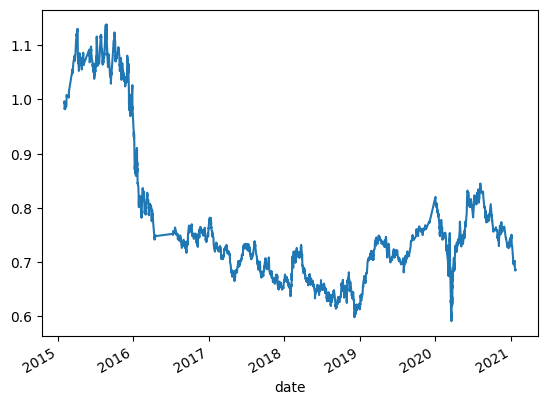

In [8]:
# Plot Strategy Returns to examine performance
(1 + signals_df['Strategy Returns']).cumprod().plot()

### Step 3: Spliting the data into training and testing datasets.

In [9]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
date,,
2015-02-02 10:15:00,24.05000,24.1500
2015-02-02 11:00:00,24.02125,24.1455
2015-02-02 11:15:00,23.99250,24.1205
2015-02-02 11:30:00,23.96750,24.0955
2015-02-02 13:30:00,23.94625,24.0700


In [10]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal']

# Review the value counts
y.value_counts()

Signal
 1.0    2422
-1.0    1881
Name: count, dtype: int64

In [11]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-02-02 10:15:00


In [12]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=6)

# Display the training end date
print(training_end)

2015-08-02 10:15:00


In [13]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-02-02 10:15:00,24.05000,24.1500
2015-02-02 11:00:00,24.02125,24.1455
2015-02-02 11:15:00,23.99250,24.1205
2015-02-02 11:30:00,23.96750,24.0955
2015-02-02 13:30:00,23.94625,24.0700


In [14]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
date,,
2015-02-02 10:15:00,24.05000,24.1500
2015-02-02 11:00:00,24.02125,24.1455
2015-02-02 11:15:00,23.99250,24.1205
2015-02-02 11:30:00,23.96750,24.0955
2015-02-02 13:30:00,23.94625,24.0700


In [15]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Step 4: Utilizing the `SVC` Classifier for Predictions

In this step, the `SVC` classifier model from SKLearn's support vector machine (SVM) learning method is employed to fit the training data and make predictions based on the testing data. The process is outlined as follows:


In [16]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred[:10]


array([-1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.])

### Step 5: Reviewing the classification report associated with the `SVC` model predictions. 

In [17]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.44      0.08      0.13      1779
         1.0       0.56      0.92      0.70      2270

    accuracy                           0.55      4049
   macro avg       0.50      0.50      0.42      4049
weighted avg       0.51      0.55      0.45      4049



### Step 6: Create a predictions DataFrame that contains columns for “Predicted” values, “Actual Returns”, and “Strategy Returns”.

In [18]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index = X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = svm_pred

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
date,,,
2015-08-03 09:30:00,-1.0,-0.013925,0.013925
2015-08-03 10:15:00,-1.0,-0.002648,0.002648
2015-08-03 10:30:00,-1.0,0.002212,-0.002212
2015-08-03 10:45:00,-1.0,0.000883,-0.000883
2015-08-03 11:00:00,-1.0,0.000441,-0.000441


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


### Step 7: Cumulative Return Analysis

In this step, a cumulative return plot is created to visualize the performance of the trading algorithm. The plot illustrates the actual returns versus the strategy returns, providing a comparative baseline for future tuning efforts.


<Axes: xlabel='date'>

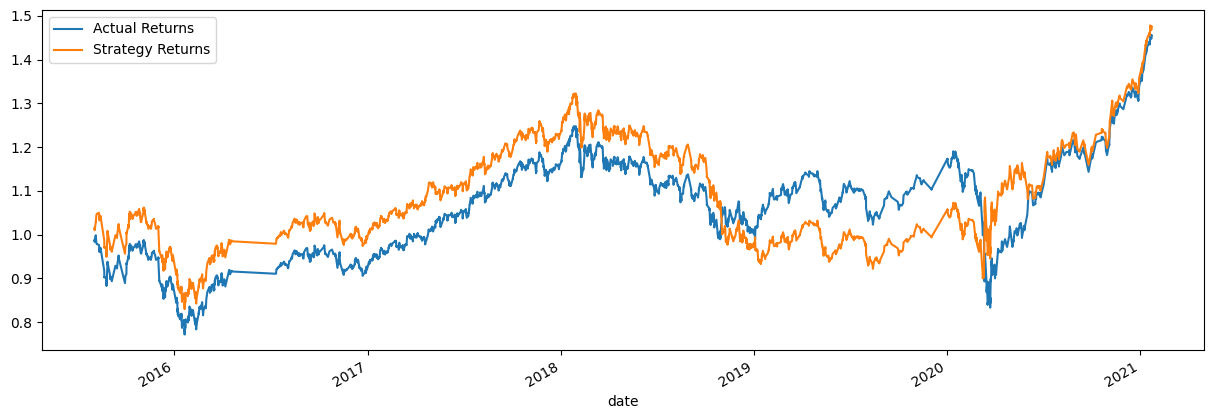

In [19]:
# Plot the actual returns versus the strategy returns
(1 + predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(figsize = (15,5))

---

## Tuning the Baseline Trading Algorithm

In this section, the focus is on fine-tuning the model's input features to identify parameters that yield the best trading outcomes. The optimization process involves adjusting key features to enhance the algorithm's performance, with the ultimate goal of maximizing cumulative strategy returns. 


### Step 1: Tuning the Training Algorithm by Adjusting Training Dataset Size

This step involves fine-tuning the training algorithm by varying the size of the training dataset. The process includes slicing the data into different periods, observing the effects of the training window on the model's performance. The implementation and analysis process is detailed below:

Upon varying the training window size, specifically increasing it to 6 months, the impact on model outcomes was assessed. The following observations were made:
1. **Volatility Comparison:**
   - There was a discernible reduction in price volatility when extending the training window.
   - Notably, during the years 2019 - 2020, the model exhibited less volatility compared to the results from the original model.

2. **Accuracy Score:**
   - The accuracy score experienced a slight increase.
   - The original model had an accuracy score of 0.55, whereas the tuned model, with an extended training dataset size, achieved a slightly improved accuracy score of 0.56.

These findings indicate that increasing the training window had a nuanced impact. While it contributed to a modest enhancement in accuracy, it also resulted in a reduction in price volatility, particularly in the specified time period. These insights provide valuable considerations for further adjustments in subsequent tuning steps.


### Step 2: Tune the trading algorithm by adjusting the SMA input features. 

- Increasing the short SMA window to 8 and decreasing the long SMA window to 20 months had a positive impact.
- The strategy returns were closer to actual returns, indicating improved accuracy.
- Accuracy score remained the same, but recall for selling (-1) increased.

---

## Evaluating a New Machine Learning Classifier

We introduce a new classifier`MLPClassifier to evaluate its performance compared to the baseline and tuned models.


### Step 1:  Import the new MLP classifier ( Multi-Layer Perceptron ) from scikit-learn's neural network module.
we will use  Stochastic Gradient Descent as the optimization algorithm for weight optimization.
Defines the structure of the neural network: two hidden layers with 8 and 4 neurons respectively.

We could have used other calssifiers such as `AdaBoost`, `DecisionTreeClassifier`, or `LogisticRegression`. 
(For the full list of classifiers, refer to the [Supervised learning page](https://scikit-learn.org/stable/supervised_learning.html) in the scikit-learn documentation.)

In [20]:
# Import a new classifier from SKLearn

# multi-layer perceptron (MLP) algorithm
from sklearn.neural_network import MLPClassifier

# Initiate the model instance
clf = MLPClassifier(solver='sgd', # Stochastic Gradient Descent
                    alpha=1e-5, # Regularization term to prevent overfitting by penalizing large parameter values.
#                    max_iter=1000,
                    hidden_layer_sizes=(8, 4), #Defines the structure of the neural network by specifying the number of neurons in each hidden layer. In this case, there are two hidden layers with 8 and 4 neurons, respectively.
                    random_state=42
                    )

### Step 2: Using the original training data as the baseline model we fit another model with the new classifier.

In [21]:
# Fit the model using the training data
MLP_model = clf.fit(X_train_scaled, y_train)

# Use the testing dataset to generate the predictions for the new model
MLP_pred = MLP_model.predict(X_test_scaled)

# Review the model's predicted values
MLP_pred 


c:\Users\sakko\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([1., 1., 1., ..., 1., 1., 1.])

### Step 3: Backtest the new model to evaluate its performance. 

The new machine learning classifier, specifically the MLP model, demonstrated a performance that slightly surpassed the baseline model. Notably, the MLP model achieved an almost perfect recall score for buying (1), showcasing its efficiency in predicting optimal entry positions.

Comparing the performance of the new MLP model with the tuned trading algorithm reveals nuanced findings. 
The MLP strategy exhibited relatively accurate returns when visualizing the cumulative returns plot, indicating its competency. However, it's crucial to note that the MLP strategy trained over a shorter time-period.

On the other hand, the tuned trading algorithm, which trained over a more extended period, showcased superior performance. It generated higher recall scores for both buying and selling, emphasizing its effectiveness in identifying optimal entry points. When specifically focusing on creating a trading algorithm to determine the best entry positions, the tuned strategy's higher recall score for the buying target (1) suggests more robust performance in identifying optimal entry points.

In summary:
- The MLP model performed slightly better than the original baseline model.
- The MLP strategy exhibited almost perfect recall for buying (1), indicating efficient entry position predictions.
- The tuned strategy, while training over a longer period, showed higher recall scores for both buying and selling.
- MLP strategy excelled in determining when to buy.


In [22]:
# Use a classification report to evaluate the model using the predictions and testing data
MLP_testing_report = classification_report(y_test, MLP_pred)

# Print the classification report
print(MLP_testing_report)


              precision    recall  f1-score   support

        -1.0       0.53      0.01      0.02      1779
         1.0       0.56      0.99      0.72      2270

    accuracy                           0.56      4049
   macro avg       0.54      0.50      0.37      4049
weighted avg       0.55      0.56      0.41      4049



In [23]:
# Create a predictions DataFrame
MLP_predictions_df = pd.DataFrame(index = X_test.index)

# Add the model predictions to the DataFrame
MLP_predictions_df['Predicted'] = MLP_pred

# Add the actual returns to the DataFrame
MLP_predictions_df['Actual Returns'] = signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
MLP_predictions_df['Strategy Returns'] = MLP_predictions_df['Actual Returns'] * MLP_predictions_df['Predicted']

# Review the DataFrame
display(MLP_predictions_df.head())
display(MLP_predictions_df.tail())


,Predicted,Actual Returns,Strategy Returns
date,,,
2015-08-03 09:30:00,1.0,-0.013925,-0.013925
2015-08-03 10:15:00,1.0,-0.002648,-0.002648
2015-08-03 10:30:00,1.0,0.002212,0.002212
2015-08-03 10:45:00,1.0,0.000883,0.000883
2015-08-03 11:00:00,1.0,0.000441,0.000441


,Predicted,Actual Returns,Strategy Returns
date,,,
2021-01-22 09:30:00,1.0,-0.006866,-0.006866
2021-01-22 11:30:00,1.0,0.002405,0.002405
2021-01-22 13:45:00,1.0,0.002099,0.002099
2021-01-22 14:30:00,1.0,0.001496,0.001496
2021-01-22 15:45:00,1.0,-0.000896,-0.000896


<Axes: xlabel='date'>

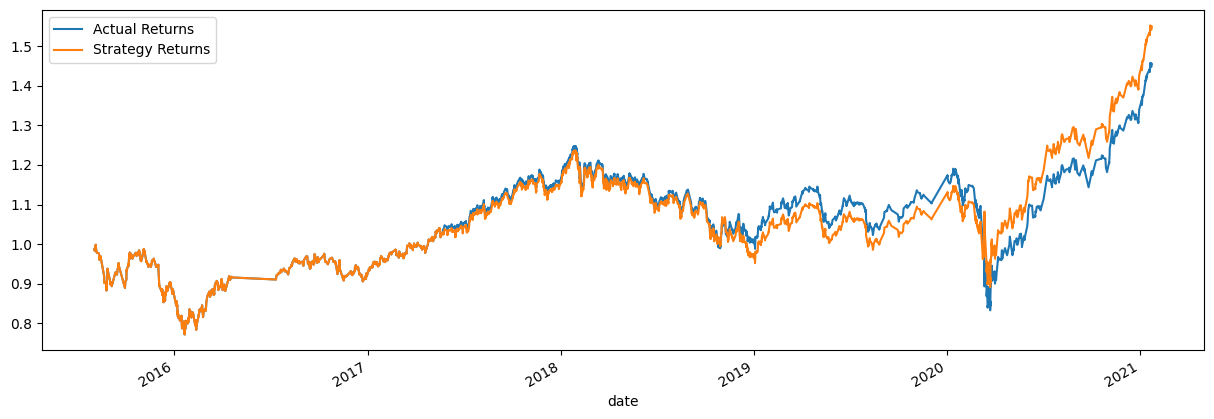

In [24]:
# Plot the actual returns versus the strategy returns
(1 + MLP_predictions_df[['Actual Returns', 'Strategy Returns']]).cumprod().plot(figsize = (15,5))